In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"



# Compare the following drugs
drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','x','d','^']
colors=['green','red','black','blue']

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load, low_memory=False)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load, low_memory=False)

# Combine the data into a single dataset, left merge on Mouse ID
clinical_drug_trial_df=pd.merge(clinical_trial_data, mouse_drug_data, how='left', on='Mouse ID')


# Display the data table for preview
clinical_drug_trial_df.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_group=clinical_drug_trial_df.groupby(['Drug','Timepoint'])
mean_tumor_volume=drug_timepoint_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df=pd.DataFrame(mean_tumor_volume)

# print(mean_tumor_volume_df.head())

mean_tumor_volume_df=mean_tumor_volume_df.reset_index()

print(mean_tumor_volume_df.keys())

# Preview DataFrame
mean_tumor_volume_df.head()




Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stem_tumor_volume=drug_timepoint_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
stem_tumor_volume_df=pd.DataFrame(stem_tumor_volume)
stem_tumor_volume_df=stem_tumor_volume_df.reset_index()

# Preview DataFrame
#print(stem_tumor_volume_df.head())
print(stem_tumor_volume_df.keys())
stem_tumor_volume_df.head()


Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:

# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df_pivot=mean_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
stem_tumor_volume_df_pivot=stem_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_tumor_volume_df_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stem_tumor_volume_df_pivot=stem_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
stem_tumor_volume_df_pivot





Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


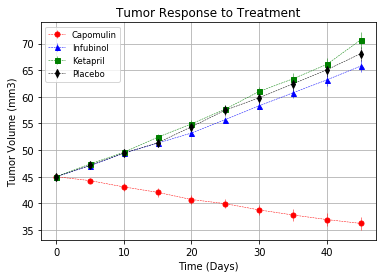

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
mean_tumor_volume_df_pivot.keys()


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
stem_tumor_volume_df_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df_pivot=mean_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
stem_tumor_volume_df_pivot=stem_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_tumor_volume_df_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


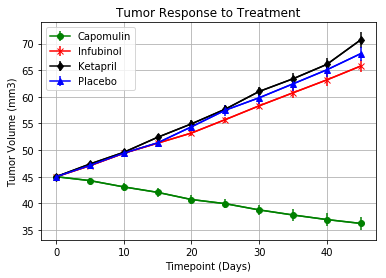

In [11]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
mtv_df=mean_tumor_volume_df_pivot
stv_df=stem_tumor_volume_df_pivot

mtv_timepoint=mtv_df.index

i=0
for drug in drug_list:
    ax.errorbar(mtv_timepoint, mtv_df[drug], yerr=stv_df[drug], marker=markers[i], color=colors[i])
    i+=1
    
plt.legend(loc="best")

i=0
for drug in drug_list:
    plt.plot(mtv_timepoint, mtv_df[drug], color=colors[i])
    i+=1

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png', dpi=300, format='png', bbox_inches='tight')
plt.show()


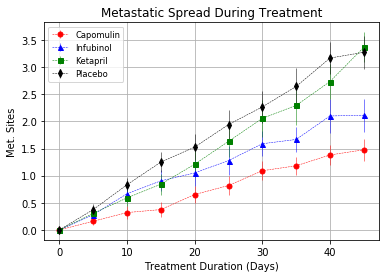

## Survival Rates

In [12]:

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_cnt=drug_timepoint_group['Mouse ID'].count()
mice_cnt

# Convert to DataFrame
mice_cnt_df=pd.DataFrame(mice_cnt)
mice_cnt_df=mice_cnt_df.reset_index()

# Preview DataFrame
mice_cnt_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:

# Minor Data Munging to Re-Format the Data Frames
mice_cnt_df_pivot=mice_cnt_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
mice_cnt_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


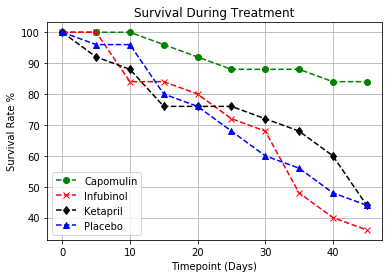

In [14]:
# Generate the Plot (Accounting for percentages)

mice_cnt_timepoint=mice_cnt_df_pivot.index
i=0
for drug in drug_list:
    plt.plot(mice_cnt_timepoint, (mice_cnt_df_pivot[drug]/mice_cnt_df_pivot[drug].max()*100), marker=markers[i], linestyle='--', color=colors[i])
    i+=1
    
plt.grid()
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate %")
# Save the Figure
plt.savefig('Survival_During_Treatment.png', dpi=300, format='png', bbox_inches='tight')
# Show the Figure
plt.show()


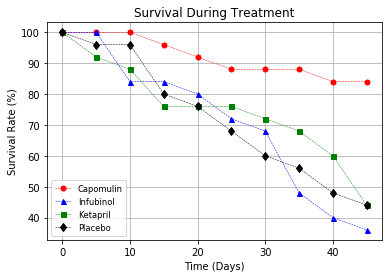

## Summary Bar Graph

In [15]:

print(mtv_df.index)
perc_change=(mtv_df.loc[45,drug_list]-mtv_df.loc[0,drug_list])/mtv_df.loc[0,drug_list]*100
print(perc_change)
perc_change_tuple=tuple(perc_change)
perc_change_tuple

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')
Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64


(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
[0 1 2 3]
(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)


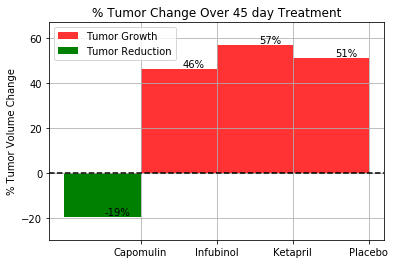

In [16]:
drug_tuple=tuple(drug_list)
print(drug_tuple)
objects = (drug_tuple)
y_pos = np.arange(len(objects))
print(y_pos)
performance = perc_change_tuple
print(performance)
plt.ylim(min(perc_change_tuple)-10,max(perc_change_tuple)+10)
for drug in range(len(drug_list)):
    if performance[drug] > 0:
        growth=plt.bar(y_pos[drug], performance[drug], color='r', align='edge', alpha=0.8, width=1)
    else:
        reduction=plt.bar(y_pos[drug], performance[drug], color='g', align='edge', alpha=1, width=1)
    plt.text(y_pos[drug]+0.7, performance[drug], '%d' % int(performance[drug])+'%', ha='center', va='bottom', color='black')

plt.grid()
plt.axhline(y=0, color = 'black', linestyle='--')
plt.xticks(y_pos+1, objects)
plt.ylabel('% Tumor Volume Change')
plt.title('% Tumor Change Over 45 day Treatment')
plt.legend((growth, reduction), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")
plt.savefig('tumor_chg_over_45.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

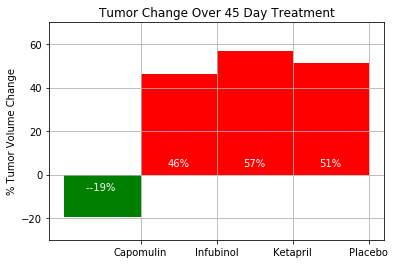